# **Projeto de Classificação de Redes**

## **1 - Medidas**

### Para caracterizar as redes decidimos por utilizar as seguintes medidas:
 - #### Average Degree
 - #### Variance Degree
 - #### Second Moment
 - #### Average Clustering
 - #### Average Shortest Path Length
 - #### Degree Assortativity Coefficient
 - #### Average closeness centrality
 - #### Average betweenness centrality
 - #### Average eigenvector centrality
 - #### Average PageRank
 - #### Modularity by Louvrain Method

In [16]:
def measures(G, p = False):
    
   
    d = {
        'N' : len(G),
        'M' : G.number_of_edges(),
        'mean' : momment_of_degree_distribution(G,1),
        'var' : momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2,
        'K2' : momment_of_degree_distribution(G,2),
        'av_cl' : nx.average_clustering(G),
        'l' : nx.average_shortest_path_length(G),
        'assor' : nx.degree_assortativity_coefficient(G),
       
    }
    
    text = f"""
    Description of the Graph: 
    
        - Number of Nodes : {d['N']:.2f}
        - Number of Edges: {d['M']:.2f}
        - Average Degree: {d['mean']:.2f}
        - Degree Variance: {d['var']:.2f}
        - Second Momement: {d['K2']:.2f}
        - Average Clustering: {d['av_cl']:.2f}
        - Average Shortest Path Length: {d['l']:.2f}
        - Degree Assortativity Coefficient: {d['assor']:.2f}
        
    """
    if p:
        print(text)
    
    return d

## **Redes**

## Nome da primeira rede e link 

In [17]:
zachary = clean_graph(nx.read_edgelist('./data/lesmis.txt', nodetype = int, data = (('weight',float),)))

In [18]:
positions = nx.spring_layout(zachary)
positions

{0: array([-0.40178491, -0.73939121]),
 1: array([-0.24952187, -0.33667219]),
 2: array([-0.16196592, -0.22021429]),
 3: array([-0.21320082, -0.21250057]),
 4: array([-0.62123178, -0.52652862]),
 5: array([-0.56246172, -0.61548084]),
 6: array([-0.49201355, -0.68542163]),
 7: array([-0.17122842, -0.75418401]),
 8: array([-0.32017825, -0.60796839]),
 9: array([-0.29045118, -0.76582877]),
 10: array([-0.08096889,  0.04379762]),
 11: array([-0.4907599 ,  0.28215249]),
 12: array([-0.3581396, -0.1479332]),
 13: array([-0.40069233,  0.40217665]),
 14: array([-0.26809257,  0.47428859]),
 15: array([-0.53830086,  0.15968817]),
 16: array([-0.14923652, -0.16537354]),
 17: array([0.01715328, 0.11531671]),
 18: array([0.02797572, 0.17084312]),
 19: array([0.031596  , 0.06194833]),
 20: array([-0.01551863,  0.02984857]),
 21: array([-0.28438884,  0.00398378]),
 22: array([-0.23091614,  0.12188851]),
 23: array([-0.26249604, -0.08634968]),
 24: array([ 0.11404395, -0.35183549]),
 25: array([-0.299

/home/aime/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


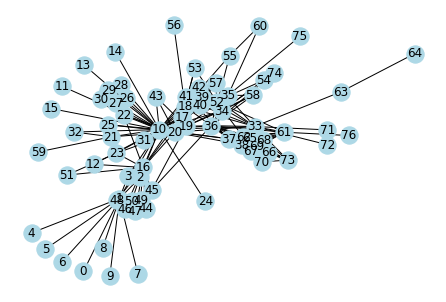

In [19]:
nx.draw(zachary, pos = positions, node_color = 'lightblue', with_labels = True)

In [20]:
d = measures(zachary, True)


    Description of the Graph: 
    
        - Number of Nodes : 77.00
        - Number of Edges: 254.00
        - Average Degree: 6.60
        - Degree Variance: 36.01
        - Second Momement: 79.53
        - Average Clustering: 0.57
        - Average Shortest Path Length: 2.64
        - Degree Assortativity Coefficient: -0.17
        
    


## **Amostragem**

### **Modelos**

In [21]:
def BA(N, k, seed):
    
    m = int(k/2)

    return clean_graph(nx.barabasi_albert_graph(N, m, seed = seed))

In [22]:
def ER(N, k, seed):
    
    p = k/(N - 1)
    
    return clean_graph(nx.gnp_random_graph(N, p, seed = seed))

In [23]:
def SW(N, k, seed, p = 0.1):
    
    return clean_graph(nx.watts_strogatz_graph(N, int(k), p, seed = seed))

In [24]:
def sample(N, K, models, labels, col_names, size = 30):
    
    attr = []
    
    for i in np.arange(size):
        for model, label in zip(models, labels):
            
            attr.append(list(measures(model(N, K, i+10)).values())+[label])
            
    attr = np.array(attr)
    
    df = pd.DataFrame(attr, columns = col_names)
    
    return df

In [27]:
col_names = ['N', 'M', 'mean', 'var', 'K2', 'av_cl', 'l','assor', 'label']

df = sample(d['N'], d['mean'], [BA, ER, SW],['BA', 'ER', 'SW'], col_names, 30)

ValueError: 10 cannot be used to generate a random.Random instance

In [26]:
df

NameError: name 'df' is not defined

## **Classificação**

In [396]:
def knn(x, y, attr, k = 5, pca_r = False, n_c = 2):
    
    X = x.to_numpy()
    Y = y.to_numpy()
    
    scaler = StandardScaler().fit(X)
    
    X = scaler.transform(X)
    
    attr = np.array(attr)
    
    attr = attr.reshape(1,len(attr)) 
    attr = scaler.transform(attr)
    
    if pca_r:

        pca = PCA(n_components = n_c)
        pca.fit(X)
            
        exple = pca.explained_variance_ratio_
        
        X = pca.transform(X)
        attr =  pca.transform(attr)
        
        plot_with_labels(X, y, fit = attr)
        
        print(f'Explained Variance Ratio: {exple.sum()}')
    
    model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    model.fit(X,Y)
    
    return model.predict(attr)

Explained Variance Ratio: 0.9687459408885344


array(['BA'], dtype=object)

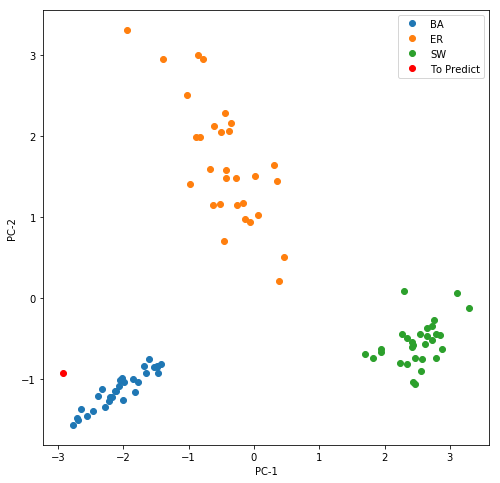

In [402]:
knn(df.iloc[:, 2:8], df.iloc[:, 8], list(d.values())[2:], pca_r = True, n_c = 3)

## **Variáveis Relevantes**

In [409]:
def most_relevants(x, y):
    
    X = x.to_numpy()
    Y = y.to_numpy()
    
    model = RandomForestClassifier(random_state = 37)
    model.fit(X,Y)
    
    random_forest = pd.Series(model.feature_importances_, index=x.columns)
    random_forest.sort_values().plot(kind='barh')

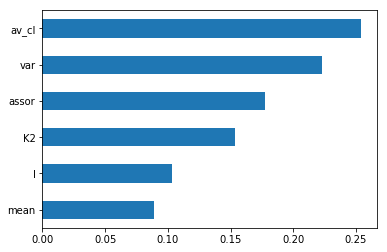

In [410]:
most_relevants(df.iloc[:, 2:8], df.iloc[:, 8])

## **Funções Auxiliares**

In [8]:
def plot_with_labels(X, labels, fit = [[],[]], title = ''):
    
    label_filters, label_values = filters(labels)
        
    plt.figure(figsize = (8, 8))

    for f, v in zip(label_filters, label_values):
        plt.plot(X[f][:, 0], X[f][:, 1], 'o', label = v)
        
    plt.plot(fit[:,0], fit[:, 1], 'o', c = 'red',  label = 'To Predict')

    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    
    plt.title(title)
    
    plt.legend()

In [9]:
def filters(labels):
    
    values = labels.unique()
    
    n = len(values)
    
    f = []
    
    for v in values:
        
        f.append(labels == v)
    
    return f, values

In [10]:
def shannon_entropy(G):
    
    k, Pk = degree_distribution(G)
    
    H = 0
    
    for p in Pk:
        
        if p > 0:
            
            H -= p*np.log2(p)
    
    return H

In [11]:
def momment_of_degree_distribution(G, m):
    
    k, Pk = degree_distribution(G)
    
    M = sum((k**m)*Pk)
    
    return M

In [12]:
def degree_distribution(G):
    
    vk = np.array(list(dict(G.degree()).values()))
    
    maxk = vk.max()
    minK = vk.min()
    
    kvalues = np.arange(maxk + 1)
    Pk = np.zeros(maxk + 1)
    
    for k in vk:
        
        Pk[k] += 1
        
    Pk = Pk/Pk.sum()
    
    return kvalues, Pk

In [13]:
 def modularity(G, c):
        
    A = nx.adjacency_matrix(G)
        
    N = len(G)
    M = G.number_of_edges()
        
    Q = 0
        
    for i in np.arange(0,N):
        
        ki = len(list(G.neighbors(i)))
            
        for j in np.arange(0,N):
                
            if(c[i]==c[j]):
                    
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
                
    Q = Q/(2*M)
    
    return Q

In [14]:
def description(G, p = False):
    
    d = {
        'N' : len(G),
        'M' : G.number_of_edges(),
        'mean' : momment_of_degree_distribution(G,1),
        'var' : momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2,
        'K2' : momment_of_degree_distribution(G,2),
        'av_cl' : nx.average_clustering(G),
        'l' : nx.average_shortest_path_length(G),
        'assor' : nx.degree_assortativity_coefficient(G)
    }
    
    text = f"""
    Description of the Graph: 
    
        - Number of Nodes : {d['N']:.2f}
        - Number of Edges: {d['M']:.2f}
        - Average Degree: {d['mean']:.2f}
        - Degree Variance: {d['var']:.2f}
        - Second Momement: {d['K2']:.2f}
        - Average Clustering: {d['av_cl']:.2f}
        - Average Shortest Path Length: {d['l']:.2f}
        - Degree Assortativity Coefficient: {d['assor']:.2f}
    """
    if p:
        print(text)
    
    return d

In [15]:
def clean_graph(G, remove_edges = True):
    
    G = G.to_undirected()
    nodes_original = G.nodes
    
    if remove_edges:
        
        G.remove_edges_from(nx.selfloop_edges(G))
    
    G_cc = sorted(nx.connected_components(G), key = len, reverse =True)
    G = G.subgraph(G_cc[0])
    G = nx.convert_node_labels_to_integers(G, first_label = 0 )
    
    return G

## **Bibliotecas**

In [2]:
import numpy as np

In [3]:
import networkx as nx

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
from community import community_louvain

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA